<a href="https://colab.research.google.com/github/Rakhi453/Predicting-Health-Insurance-Price/blob/main/Health_Insurance_Price_prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Health Insurance Price for an individual or family

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_excel("/content/Health_insurance_cost.xlsx")

In [ ]:
data.head(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(data.isnull().sum())
null_columns=data.columns[data.isnull().any()]
print(null_columns)

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64
Index(['age', 'BMI', 'health_insurance_price'], dtype='object')


In [ ]:
missing_percentage=data.isnull().mean()*100
print(missing_percentage)

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64


In [ ]:
data[data.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data[data.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price


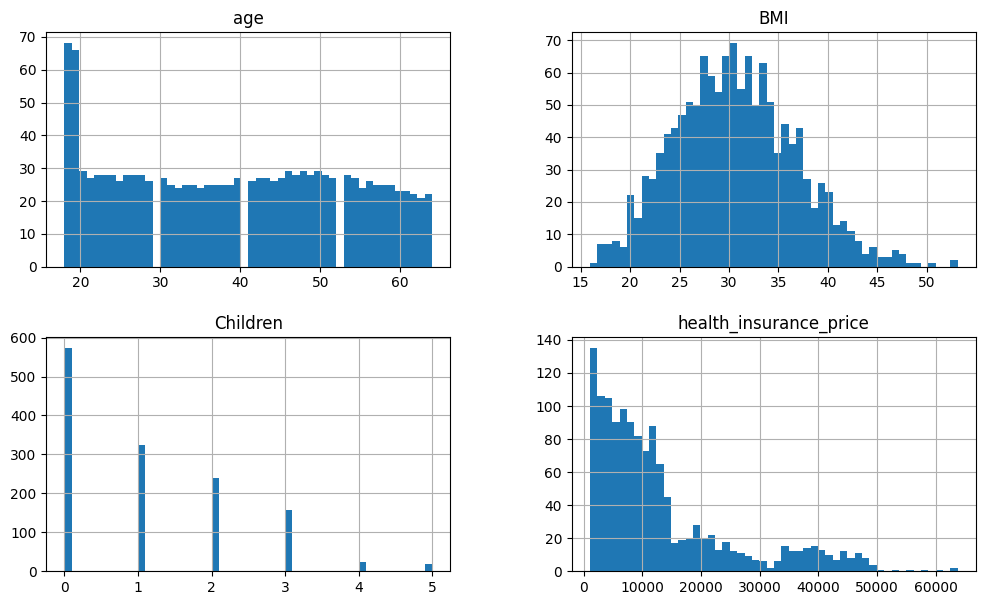

In [ ]:
data.hist(bins=50,figsize=(12,7))
plt.show()

<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

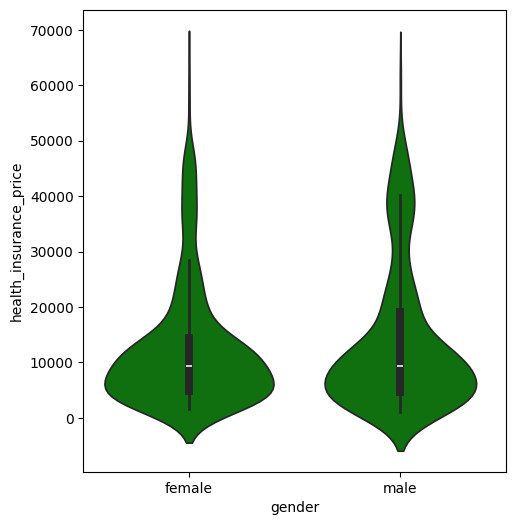

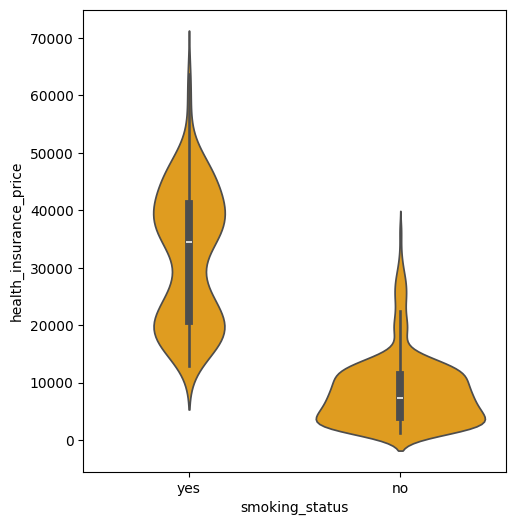

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(data=data,x="gender",y="health_insurance_price",color="green")

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.violinplot(data=data,x="smoking_status",y="health_insurance_price",color="orange")

Conclusion:

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000.
In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000. For smoker the minimum insurance charge is itself 5000.

Text(0.5, 1.0, 'distribution of health_insurance_price')

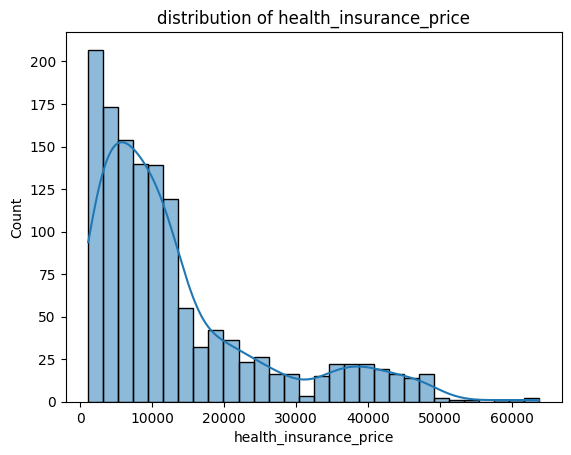

In [ ]:
sns.histplot(data["health_insurance_price"],kde=True)
plt.title("distribution of health_insurance_price")

The Data distribution for health_insurance_price is Right skewed and there is possibility for outliers.

Check for Outliers

In [ ]:
def out_std(data, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = data[column].mean(), data[column].std()
    # calculate the cutoff value : in normal distribution all values out of 3*std are outliers.
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_std(data,'health_insurance_price')

The lower bound value is -23062.211547778934
The upper bound value is 49616.688656556464
Total number of outliers are 7


<ipython-input-24-b4c3095c79ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.health_insurance_price, kde=False)


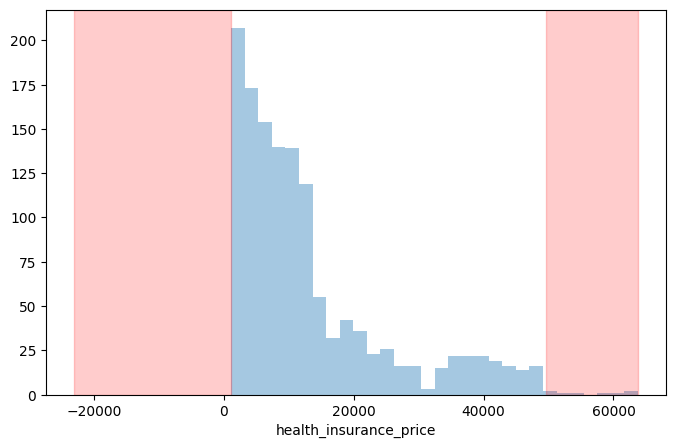

In [ ]:
plt.figure(figsize = (8,5))
sns.distplot(data.health_insurance_price, kde=False)
plt.axvspan(xmin = lower,xmax= data.health_insurance_price.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= data.health_insurance_price.max(),alpha=0.2, color='red')

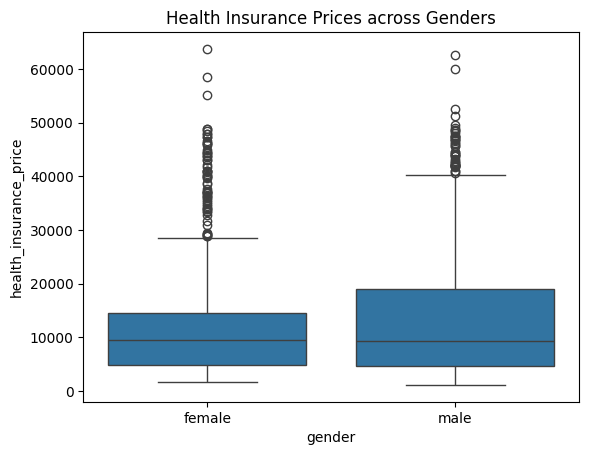

In [ ]:
# Analyze health insurance prices across different genders
sns.boxplot(x="gender",y="health_insurance_price",data=data)
plt.title("Health Insurance Prices across Genders")
plt.show()

Conclusion:

For females the outliers are more comparetively to males but the upper limit of female is around 30,000 whereas upper limit of male is around 40,000.
For both genders median value is same.

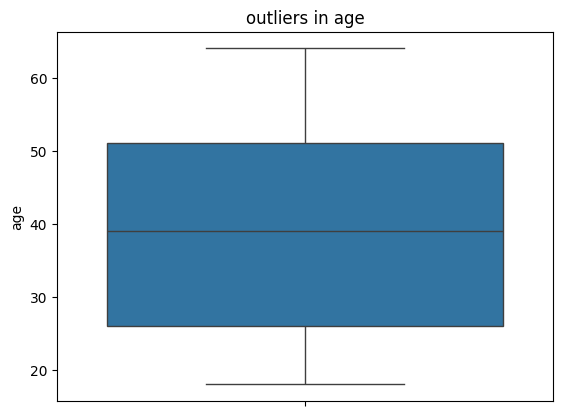

In [ ]:
# Identify outliers in age
sns.boxplot(data["age"])
plt.title("outliers in age")
plt.show()

<Axes: title={'center': 'location vs health_insurance_price'}, xlabel='location', ylabel='health_insurance_price'>

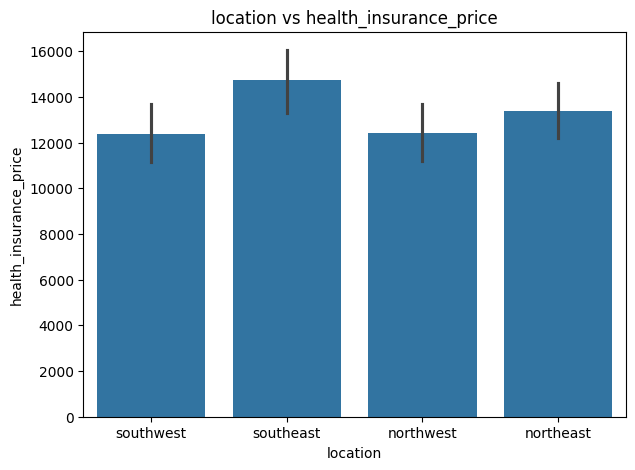

In [ ]:
# Analyze health insurance prices across different location
plt.figure(figsize=(7,5))
plt.title('location vs health_insurance_price')
sns.barplot(x='location',y='health_insurance_price',data=data)

<Axes: title={'center': 'smoking_status vs health_insurance_price'}, xlabel='smoking_status', ylabel='health_insurance_price'>

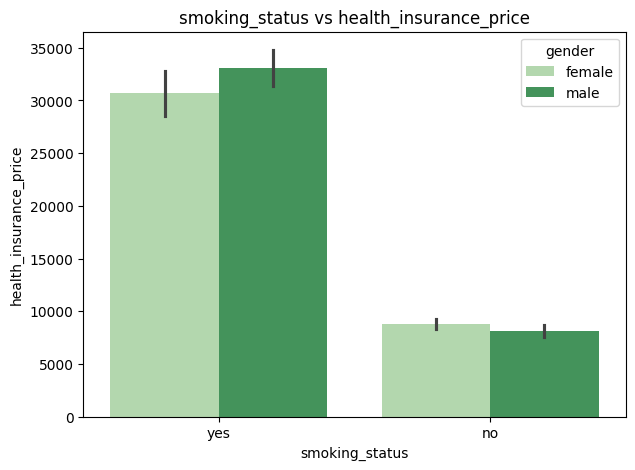

In [ ]:
# Analyze health insurance prices across different smoking_status
plt.figure(figsize=(7,5))
plt.title('smoking_status vs health_insurance_price')
sns.barplot(x='smoking_status',y='health_insurance_price',data=data,palette='Greens',hue='gender')

Conclusion:
1. For both the genders who smoke are having nearly same insurance value but  more compared to non smokers.

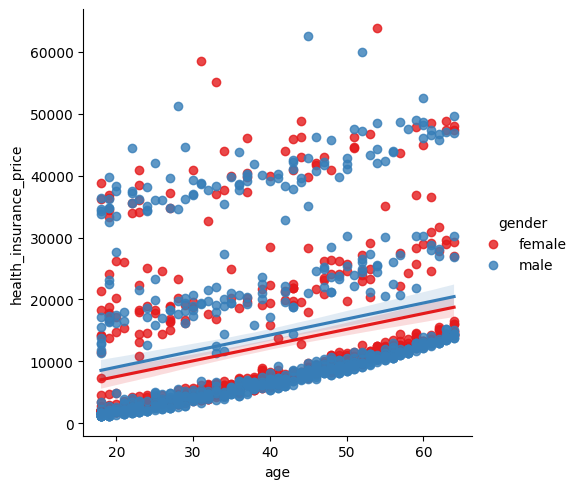

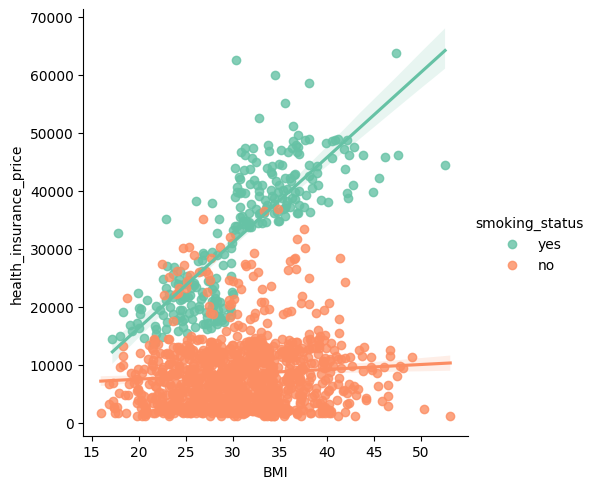

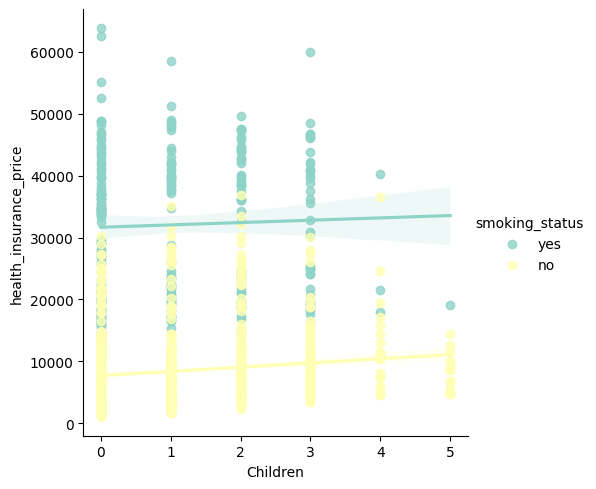

In [ ]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=data, hue='gender', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set3')

Text(0.5, 1.0, 'BMI VS health_insurance_price')

<Figure size 700x500 with 0 Axes>

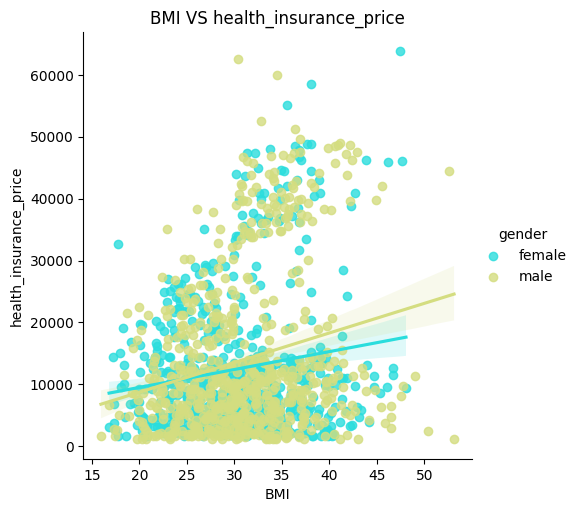

In [ ]:
plt.figure(figsize=(7,5))
sns.lmplot(x='BMI',y='health_insurance_price',hue='gender',data=data,palette='rainbow')
plt.title('BMI VS health_insurance_price')

<ipython-input-31-7dbbf9ae6767>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='seismic')


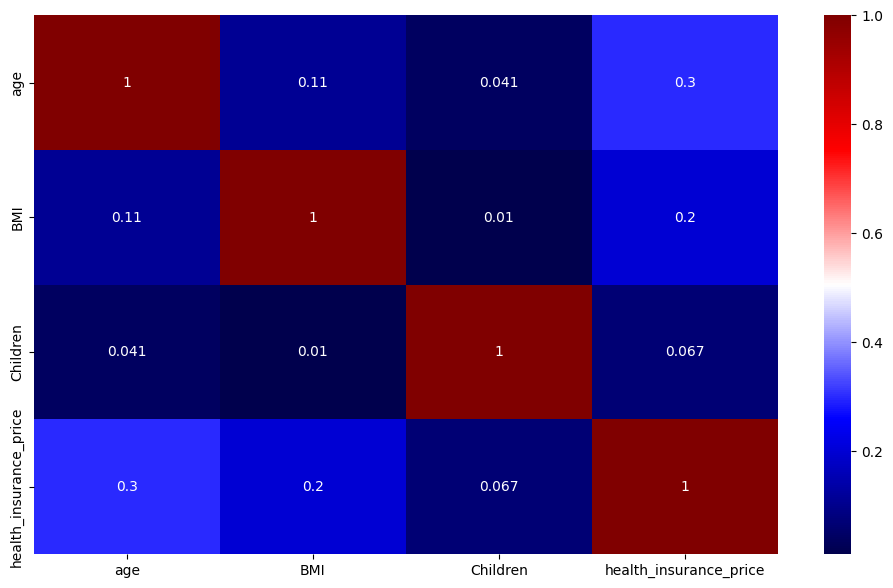

In [ ]:
#Finding the correlation
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='seismic')
plt.show()

Conclusion:

The heatmap shows us there is a positive correlation between age and health_insurance_price. As the age increases health_insurance_price also increase or vice versa.

We can also see that there is a weak positive correlation between BMI and health_insurance_price.

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder
#encode categorical variables
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["smoking_status"]=le.fit_transform(data["smoking_status"])
data["location"]=le.fit_transform(data["location"])

In [ ]:
#Imputation
from sklearn.impute import SimpleImputer



Mean

In [ ]:
ins_mean = data.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
ins_mean.iloc[:, :] = mean_imputer.fit_transform(ins_mean)

<ipython-input-35-82d16db72d62>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_mean.iloc[:, :] = mean_imputer.fit_transform(ins_mean)


In [ ]:
ins_mean.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

Median

In [ ]:
ins_median=data.copy(deep=True)
median_imputer=SimpleImputer(strategy='median')
ins_median.iloc[:,:]=median_imputer.fit_transform(ins_median)

<ipython-input-37-5d405ca8a30c>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_median.iloc[:,:]=median_imputer.fit_transform(ins_median)


Mode

In [ ]:
ins_mode=data.copy(deep=True)
mode_imputer=SimpleImputer(strategy='most_frequent')
ins_mode.iloc[:, :] = mode_imputer.fit_transform(ins_mode)


<ipython-input-38-f9bc3e001e1b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_mode.iloc[:, :] = mode_imputer.fit_transform(ins_mode)


Constant

In [ ]:
ins_constant=data.copy(deep=True)
mode_imputer=SimpleImputer(strategy="constant",fill_value=0)
ins_constant.iloc[:,:]=mode_imputer.fit_transform(ins_constant)

<ipython-input-39-7be1797ae7a4>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_constant.iloc[:,:]=mode_imputer.fit_transform(ins_constant)


KNN

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=76a6af02e3ca62c7783c254cb30ea09033c0ff2c52db90c98141f0b23421530e
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=601b3bb54b7a6aa9dc0202b5b81835d26d6d0ee0cd8f5797ce15022a66089076
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import KNN

In [ ]:
ins_knn=data.copy()
knn_imputer=KNN()
ins_knn.iloc[:,:]=knn_imputer.fit_transform(ins_knn)

Imputing row 1/1337 with 1 missing, elapsed time: 0.277
Imputing row 101/1337 with 0 missing, elapsed time: 0.279
Imputing row 201/1337 with 0 missing, elapsed time: 0.280
Imputing row 301/1337 with 0 missing, elapsed time: 0.282
Imputing row 401/1337 with 0 missing, elapsed time: 0.283
Imputing row 501/1337 with 0 missing, elapsed time: 0.284
Imputing row 601/1337 with 0 missing, elapsed time: 0.285
Imputing row 701/1337 with 0 missing, elapsed time: 0.286
Imputing row 801/1337 with 0 missing, elapsed time: 0.287
Imputing row 901/1337 with 0 missing, elapsed time: 0.288
Imputing row 1001/1337 with 0 missing, elapsed time: 0.289
Imputing row 1101/1337 with 0 missing, elapsed time: 0.289
Imputing row 1201/1337 with 0 missing, elapsed time: 0.290
Imputing row 1301/1337 with 0 missing, elapsed time: 0.291


<ipython-input-42-f53e144661b6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_knn.iloc[:,:]=knn_imputer.fit_transform(ins_knn)


MICE

In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer() # calling iterativeIMputer
ins_MICE = data.copy(deep=True) # creating a copy of penguin
ins_MICE.iloc[:, :] = MICE_imputer.fit_transform(ins_MICE)


<ipython-input-43-dbb2d1cf57e7>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ins_MICE.iloc[:, :] = MICE_imputer.fit_transform(ins_MICE)


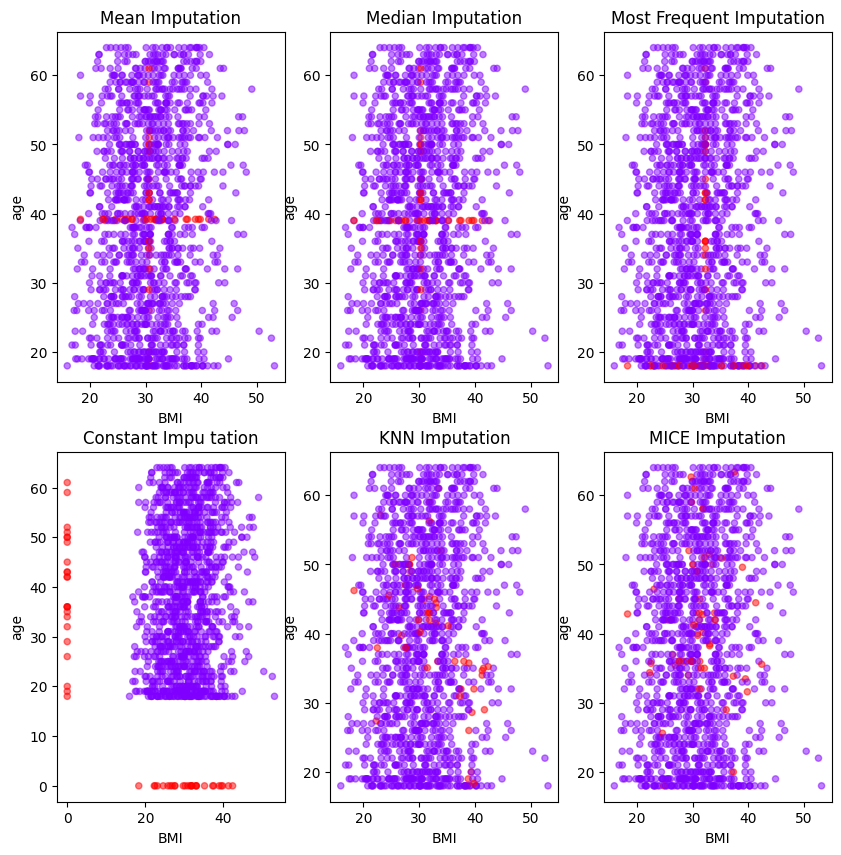

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = data['BMI'].isnull() + data['age'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': ins_mean, # creating a python dictionary
               'Median Imputation': ins_median,
               'Most Frequent Imputation': ins_mode,
               'Constant Impu tation': ins_constant,
               'KNN Imputation': ins_knn,
              'MICE Imputation': ins_MICE}
for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='BMI', y='age', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

In [ ]:
data_copy=ins_MICE.copy()
# Here we can change the which Imputed Data take to the model.


In [ ]:
data_copy["age"]=data_copy["age"].astype("int")
# Changng the datatype of  to int for better understanding.


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   int64  
 1   gender                  1337 non-null   float64
 2   BMI                     1337 non-null   float64
 3   Children                1337 non-null   float64
 4   smoking_status          1337 non-null   float64
 5   location                1337 non-null   float64
 6   health_insurance_price  1337 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 83.6 KB


In [ ]:
# BINNING : Converting Numerical to categorical of (BMI) for age it is not standard and will affect model.
conditions=[
            (data_copy["BMI"]<=18.5),
            (data_copy["BMI"]>18.5) & ( data_copy["BMI"]<=24.9),
            (data_copy["BMI"]>24.9) & (data_copy["BMI"]<=29.9),
            (data_copy["BMI"]>=30)

]
values=['underweight','normal','overweight','obese']
data_copy['BMI']=np.select(conditions,values)

In [ ]:
data_copy['BMI']=le.fit_transform(data_copy['BMI'])
data_enc=data_copy.copy()

In [ ]:
data_enc.head(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,3,0.0,1.0,3.0,16884.92400
1,18,1.0,2,1.0,0.0,2.0,1725.55230
2,28,1.0,2,3.0,0.0,2.0,4449.46200
3,33,1.0,1,0.0,0.0,1.0,21984.47061
4,32,1.0,3,0.0,0.0,1.0,3866.85520


In [ ]:
from scipy import stats
# Handle outliers
# We can use the Z-score method to identify and remove outliers
z_scores=stats.zscore(data_enc["health_insurance_price"])
data_out=data_enc[(z_scores<3)]


In [ ]:
data_out.shape

(1330, 7)

In [ ]:
## Perform feature engineering
# This step involves encoding categorical variables, scaling numerical variables, etc.
# Depending on the dataset, you may need to perform additional data transformations

In [ ]:
from scipy.stats import pearsonr
correlation,pvalue=pearsonr(data_out["age"],data_out["health_insurance_price"])
print(correlation)
print(pvalue)

0.30913545988378544
7.615978181190512e-31


Model Building

Linear Regression

In [ ]:
X=data_out.iloc[:,:-1]
y=data_out.iloc[:,-1:]

In [ ]:
y

,health_insurance_price
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)


In [ ]:
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 1.12530271,  0.98692754, -0.18241789, -0.89630247, -0.49146745,
        -0.48158782],
       [ 0.69476618,  0.98692754, -0.18241789, -0.89630247, -0.49146745,
         1.33546695],
       [-0.16630687,  0.98692754, -0.18241789, -0.06774832,  2.03472274,
        -1.39011521],
       ...,
       [-1.02737993, -1.01324561, -1.56879389, -0.06774832, -0.49146745,
         1.33546695],
       [ 0.04896139,  0.98692754,  1.2039581 ,  0.76080583, -0.49146745,
         1.33546695],
       [-0.88386775,  0.98692754, -0.18241789,  0.76080583, -0.49146745,
         1.33546695]])

In [ ]:
X_test

array([[-1.47342968, -0.99250926, -0.20261722, -0.96929997, -0.53968707,
         0.48649775],
       [ 1.366145  ,  1.00754728, -0.20261722, -0.96929997, -0.53968707,
         0.48649775],
       [ 0.15932576, -0.99250926,  1.17933615, -0.1348864 , -0.53968707,
         1.37896949],
       ...,
       [-1.11848285,  1.00754728, -1.5845706 , -0.96929997, -0.53968707,
        -0.40597399],
       [-0.40858918, -0.99250926,  1.17933615, -0.1348864 , -0.53968707,
         0.48649775],
       [ 0.01734703, -0.99250926,  1.17933615,  0.69952716, -0.53968707,
        -0.40597399]])

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
Lin_r=LinearRegression()
Lin_r.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_lin_r=cross_val_score(Lin_r,X,y,cv=10)
mean_cv_lin_r=np.mean(cv_lin_r)
print(mean_cv_lin_r)

0.7244072134322364


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn .metrics import r2_score
y_pred_linear_reg_train =Lin_r.predict(X_train)
y_pred_linear_reg_test=Lin_r.predict(X_test)
r2_score_train_lin_r=r2_score(Y_train,y_pred_linear_reg_train)
r2_score_test_lin_r=r2_score(Y_test,y_pred_linear_reg_test)

rmse_lin_r=np.sqrt(mean_squared_error(Y_test,y_pred_linear_reg_test))

print('R2_score_Train:{0:.3f}'.format(r2_score_train_lin_r))
print('R2_score_Test:{0:.3f}'.format(r2_score_test_lin_r))
print('rmse_lin:{0:.3f}'.format(rmse_lin_r))

R2_score_Train:0.737
R2_score_Test:0.692
rmse_lin:6579.737


In [ ]:
#Decison Tree
from sklearn.tree import DecisionTreeRegressor
dt_r=DecisionTreeRegressor()
dt_r.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
# Predict the response for the training dataset
y_pred_dt_train=dt_r.predict(X_train)
r2_score_train_dt=r2_score(Y_train,y_pred_dt_train)

# Predict the response for the test dataset
y_pred_dt_test=dt_r.predict(X_test)
r2_score_test_dt=r2_score(Y_test,y_pred_dt_test)

# Calculate the root mean squared error (RMSE)
rmse_dt=np.sqrt(mean_squared_error(Y_test,y_pred_dt_test))


In [ ]:
print('R2_score (train): {0:.3f}'.format(r2_score_train_dt))
print('R2_score (test): {0:.3f}'.format(r2_score_test_dt))
print('RMSE: {0:.3f}'.format(rmse_dt))

R2_score (train): 0.985
R2_score (test): 0.743
RMSE: 6009.494


In [ ]:
print('R2_score (train):{0:.3f}'.format(r2_score_train_dt))
print('R2_score (test):{0:.3f}'.format(r2_score_train_dt))

R2_score (train):0.985
R2_score (test):0.985


In [ ]:
print('rmse_dt:{0:.3f}'.format(rmse_dt))

rmse_dt:6009.494


In [ ]:
#Random_forest_regressor
#Decison Tree
from sklearn.ensemble import RandomForestRegressor
rfr_r=RandomForestRegressor()
rfr_r.fit(X_train,Y_train)


<ipython-input-75-6da0d2a65da1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_r.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn .metrics import r2_score
y_pred_rfr_r_train =rfr_r.predict(X_train)
y_pred_rfr_r_test=rfr_r.predict(X_test)
r2_score_train_rfr_r=r2_score(Y_train,y_pred_rfr_r_train)
r2_score_test_rfr_r=r2_score(Y_test,y_pred_rfr_r_test)

rmse_rfr_r=np.sqrt(mean_squared_error(Y_test,y_pred_rfr_r_test))

print('R2_score_Train:{0:.3f}'.format(r2_score_train_rfr_r))
print('R2_score_Test:{0:.3f}'.format(r2_score_test_rfr_r))
print('rmse_lin:{0:.3f}'.format(rmse_rfr_r))

R2_score_Train:0.967
R2_score_Test:0.819
rmse_lin:5039.619


In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_train_svr=svr.predict(X_train)

y_pred_test_svr=svr.predict(X_test)

In [ ]:
r2_score_train=r2_score(Y_train,y_pred_train_svr)
r2_score_test=r2_score(Y_test,y_pred_test_svr)
rmse_svr=np.sqrt(mean_squared_error(Y_test,y_pred_test_svr))

print("r2_score_train :{0:.3f}".format(r2_score_train))
print("r2_score_test:{0:.3f}".format(r2_score_test))
print("rmse_svr:{0:.3f}".format(rmse_svr))



r2_score_train :-0.092
r2_score_test:-0.126
rmse_svr:12587.062


In [ ]:
from xgboost import XGBRegressor #Extreme Gradient Boost
import xgboost as xgb
xgb_r=xgb.XGBRegressor()
xgb_r.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In scikit-learn, the linear regression model is implemented within the linear_model module, and it's named LinearRegression().
In XGBoost, the regressor model is implemented within the xgboost module, and it's named XGBRegressor().

In [ ]:
y_pred_train_xgb=xgb_r.predict(X_train)
y_pred_test_xgb=xgb_r.predict(X_test)

In [ ]:
r2_score_train_xgb=r2_score(Y_train,y_pred_train_xgb)
r2_score_test_xgb=r2_score(Y_test,y_pred_test_xgb)

rmse_xgb=np.sqrt(mean_squared_error(Y_test,y_pred_test_xgb))

print('r2_score_train_xgb:{0:.3f}'.format(r2_score_train_xgb))

print('r2_score_test_xgb:{0:.3f}'.format(r2_score_test_xgb))
print('rmse_xgb:{0:.3f}'.format(rmse_xgb))

r2_score_train_xgb:0.977
r2_score_test_xgb:-0.306
rmse_xgb:13558.126
